In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import defaultdict

# Setup directories

In [2]:
base_dir = '/Users/Avi/Dissertation/Data'
scaffold_test_data_directory = os.path.join(base_dir, 'Curated/Test_Data/Scaffold_Split')
random_test_data_directory = os.path.join(base_dir, 'Curated/Test_Data/Random_Split')
train_data_directory = os.path.join(base_dir, 'Non_Curated/Train_Data')
results_directory = '/Users/Avi/Dissertation/Results/Exploratory_Analysis/Split_Data/Non_Curated'
os.makedirs(results_directory, exist_ok=True)

In [3]:
targets = ['CHEMBL4078', 'CHEMBL279', 'CHEMBL5763', 'CHEMBL240', 'CHEMBL4005']

# Defining Functions

In [4]:
def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    return Chem.MolToSmiles(scaffold)

def load_data(target):
    train_df = pd.read_csv(os.path.join(train_data_directory, f'{target}_Train.csv'))
    scaffold_test_df = pd.read_csv(os.path.join(scaffold_test_data_directory, f'{target}_Test_Scaffold.csv'))
    random_test_df = pd.read_csv(os.path.join(random_test_data_directory, f'{target}_Test_Random.csv'))
    return train_df, scaffold_test_df, random_test_df

def plot_pchembl_distribution(train_df, scaffold_test_df, random_test_df, target):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=train_df, x='pchembl_value', label='Train', fill=True)
    sns.kdeplot(data=scaffold_test_df, x='pchembl_value', label='Scaffold Test', fill=True)
    sns.kdeplot(data=random_test_df, x='pchembl_value', label='Random Test', fill=True)
    plt.title(f'{target} - pChEMBL_Value Distribution (Non-Curated)')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(results_directory, f'{target}_Non_Curated_pChEMBL_Distribution_Plot.png'))
    plt.show()

def plot_activity_distribution(train_df, scaffold_test_df, random_test_df, target):
    plt.figure(figsize=(10, 5))
    data = [
        train_df['activity'].value_counts(normalize=True),
        scaffold_test_df['activity'].value_counts(normalize=True),
        random_test_df['activity'].value_counts(normalize=True)
    ]
    X = np.arange(2)
    width = 0.25
    plt.bar(X - width, data[0], width, label='Train')
    plt.bar(X, data[1], width, label='Scaffold Test')
    plt.bar(X + width, data[2], width, label='Random Test')
    plt.title(f'{target} - Activity Distribution (Non-Curated)')
    plt.xticks(X, ['Inactive', 'Active'])
    plt.ylabel('Proportion')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(results_directory, f'{target}_Non_Curated_Activity_Distribution_Plot.png'))
    plt.show()

def check_scaffold_duplicates(train_df, scaffold_test_df, random_test_df, target):
    def get_scaffold_set(df):
        return set(df['canonical_smiles'].apply(get_scaffold))

    train_scaffolds = get_scaffold_set(train_df)
    scaffold_test_scaffolds = get_scaffold_set(scaffold_test_df)
    random_test_scaffolds = get_scaffold_set(random_test_df)

    print(f"\n{target} - Checking for Scaffold Duplicates:")
    print(f"Number of scaffolds - Train: {len(train_scaffolds)}, "
          f"Scaffold Test: {len(scaffold_test_scaffolds)}, "
          f"Random Test: {len(random_test_scaffolds)}")

    train_scaffold_duplicates = train_scaffolds.intersection(scaffold_test_scaffolds)
    print(f"Scaffolds in both Train and Scaffold Test: {len(train_scaffold_duplicates)}")

    random_scaffold_duplicates = train_scaffolds.intersection(random_test_scaffolds)
    print(f"Scaffolds in both Train and Random Test: {len(random_scaffold_duplicates)}")

    test_scaffold_duplicates = scaffold_test_scaffolds.intersection(random_test_scaffolds)
    print(f"Scaffolds in both Scaffold Test and Random Test: {len(test_scaffold_duplicates)}")

    all_duplicates = train_scaffolds.intersection(scaffold_test_scaffolds, random_test_scaffolds)
    print(f"Scaffolds in all three sets: {len(all_duplicates)}")

# Main Execution


Analyzing CHEMBL4078


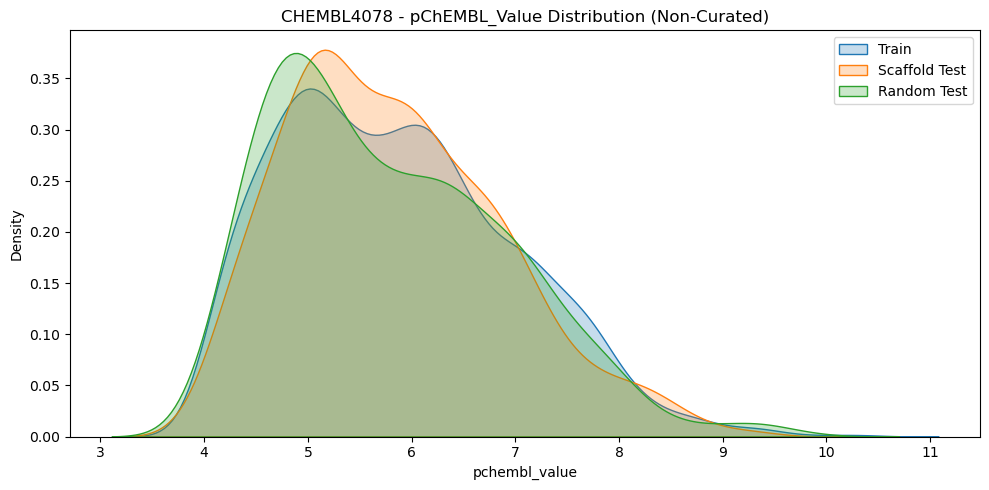

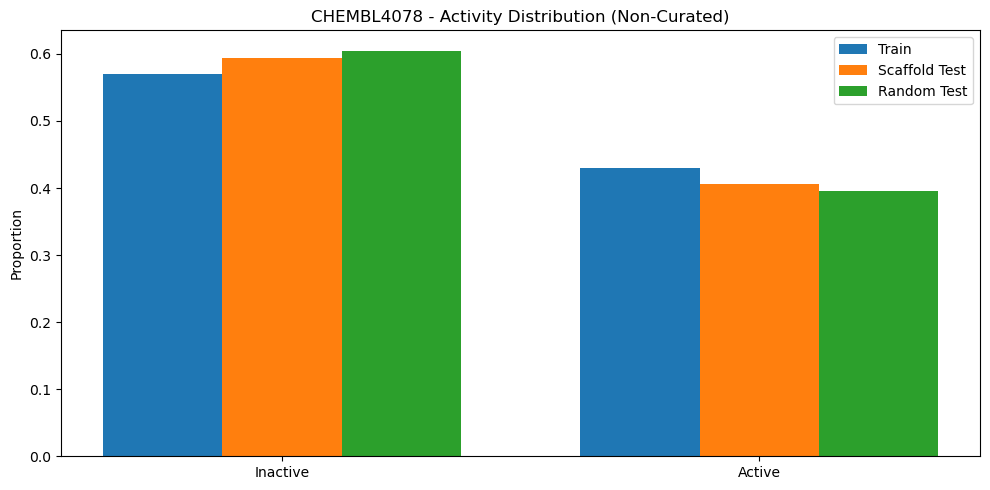


CHEMBL4078 - Checking for Scaffold Duplicates:
Number of scaffolds - Train: 1138, Scaffold Test: 333, Random Test: 456
Scaffolds in both Train and Scaffold Test: 0
Scaffolds in both Train and Random Test: 250
Scaffolds in both Scaffold Test and Random Test: 0
Scaffolds in all three sets: 0

Analyzing CHEMBL279


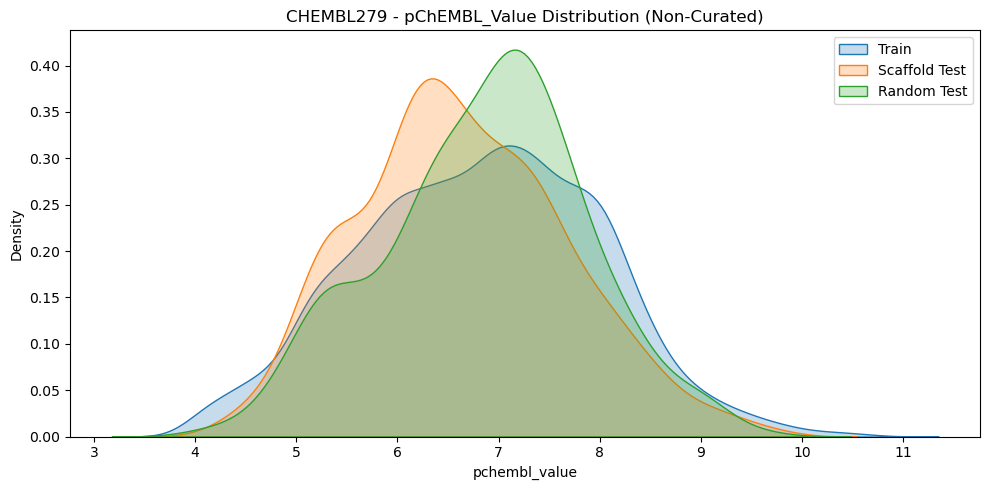

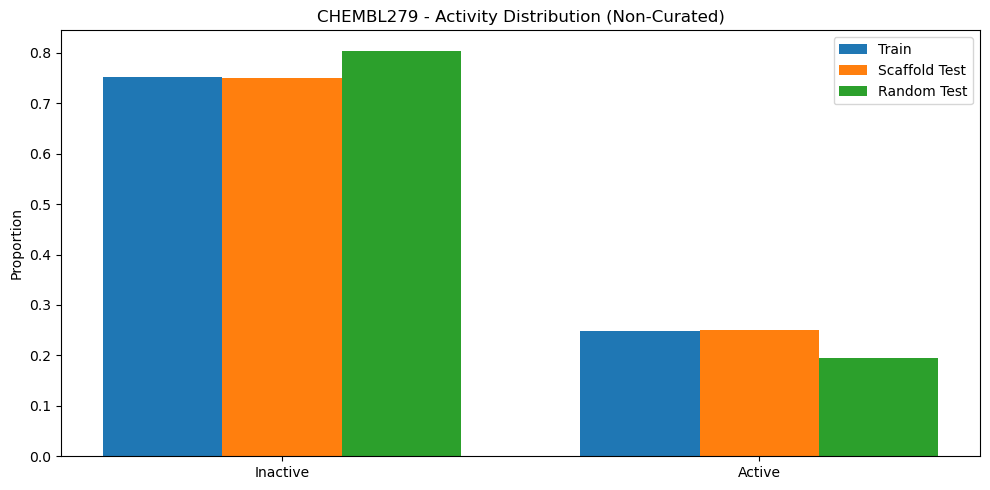


CHEMBL279 - Checking for Scaffold Duplicates:
Number of scaffolds - Train: 2134, Scaffold Test: 186, Random Test: 377
Scaffolds in both Train and Scaffold Test: 0
Scaffolds in both Train and Random Test: 174
Scaffolds in both Scaffold Test and Random Test: 0
Scaffolds in all three sets: 0

Analyzing CHEMBL5763


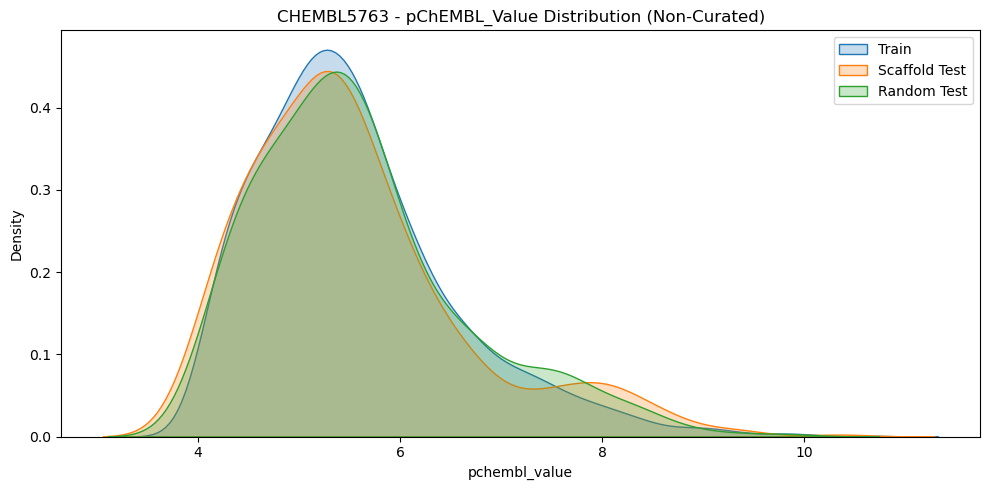

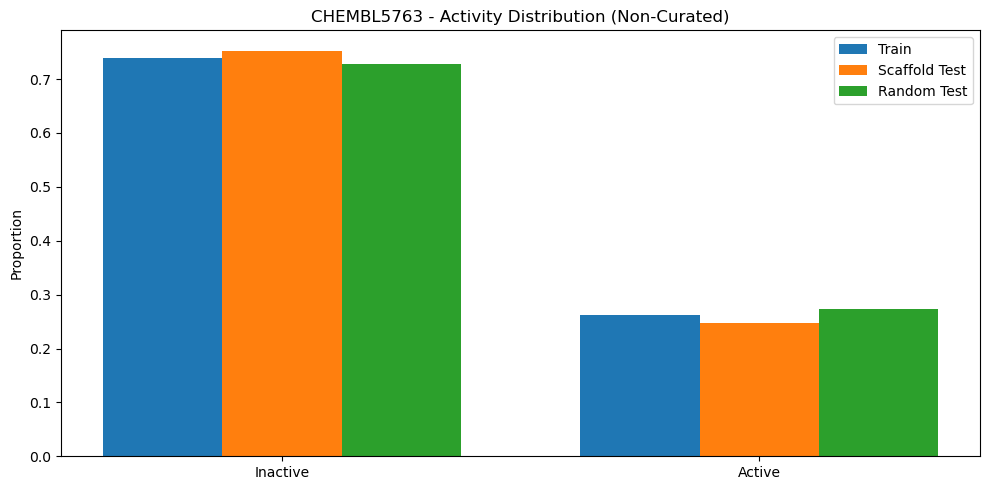


CHEMBL5763 - Checking for Scaffold Duplicates:
Number of scaffolds - Train: 941, Scaffold Test: 219, Random Test: 336
Scaffolds in both Train and Scaffold Test: 0
Scaffolds in both Train and Random Test: 175
Scaffolds in both Scaffold Test and Random Test: 0
Scaffolds in all three sets: 0

Analyzing CHEMBL240


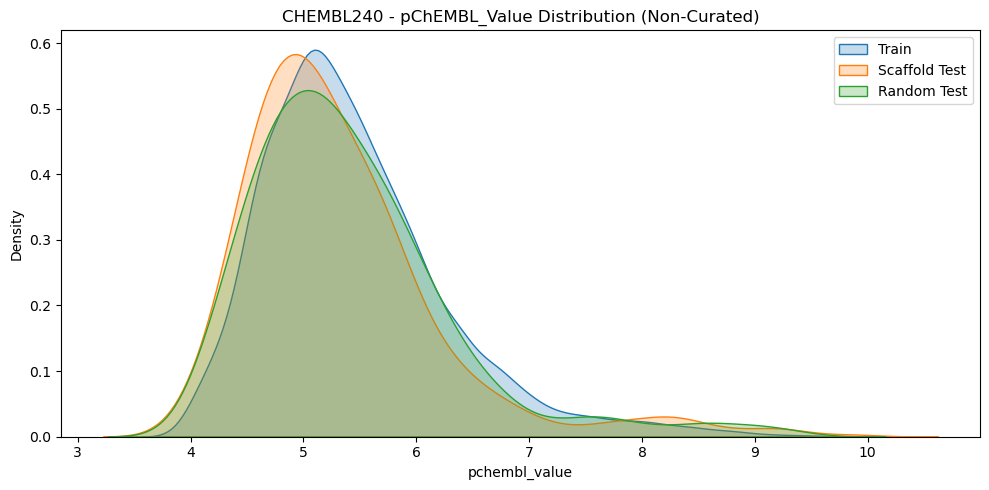

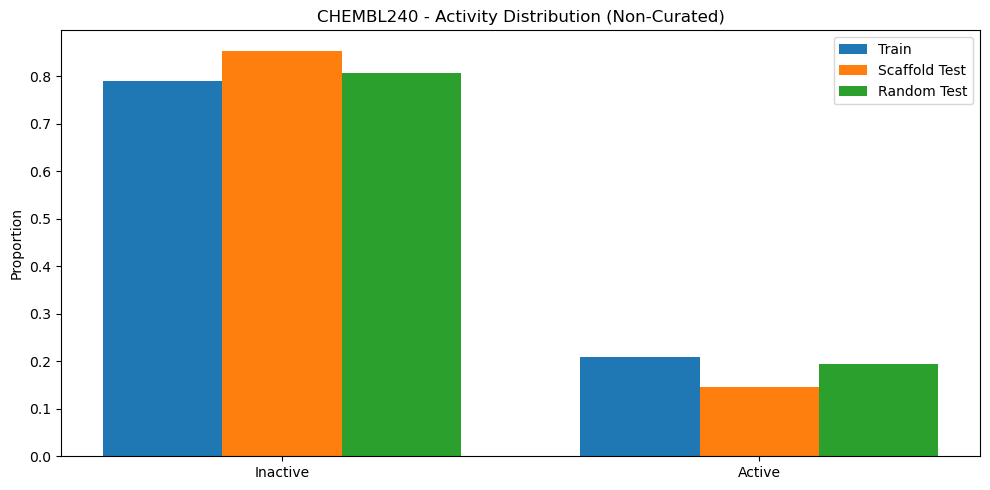


CHEMBL240 - Checking for Scaffold Duplicates:
Number of scaffolds - Train: 3748, Scaffold Test: 310, Random Test: 417
Scaffolds in both Train and Scaffold Test: 0
Scaffolds in both Train and Random Test: 171
Scaffolds in both Scaffold Test and Random Test: 0
Scaffolds in all three sets: 0

Analyzing CHEMBL4005


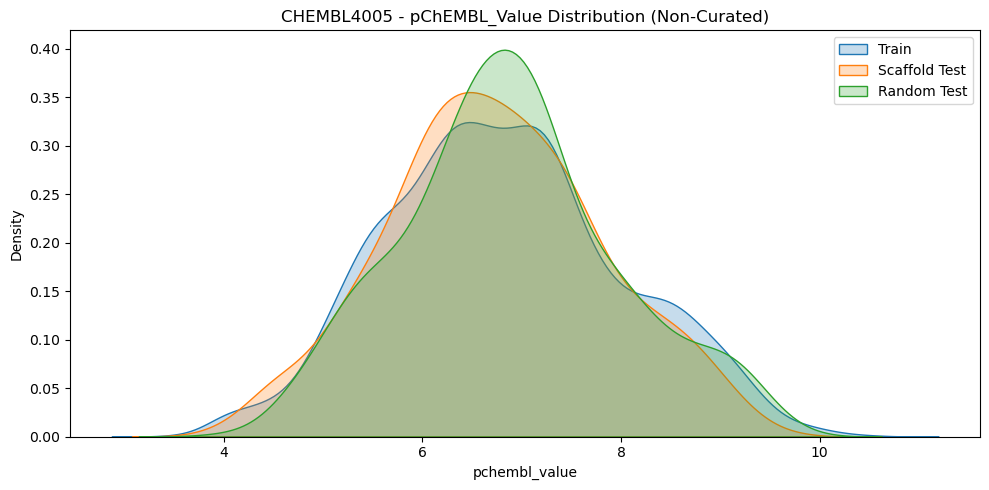

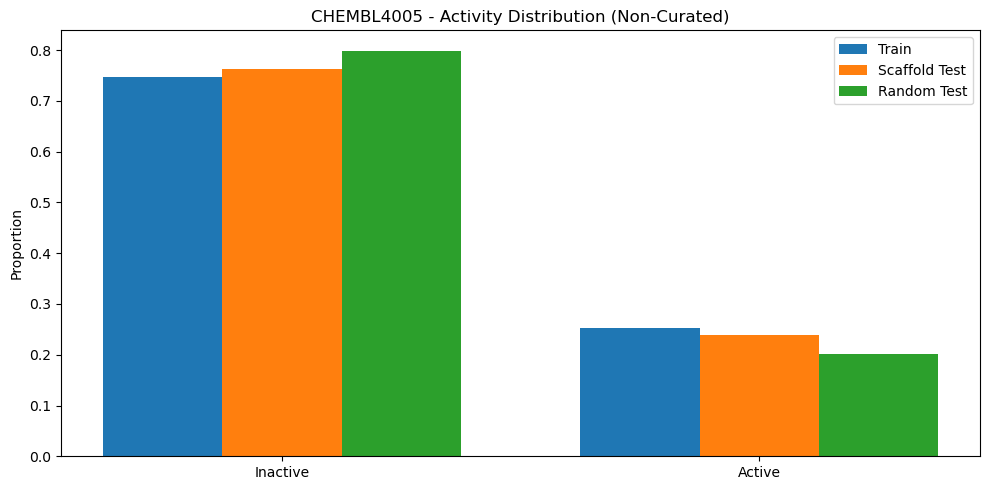


CHEMBL4005 - Checking for Scaffold Duplicates:
Number of scaffolds - Train: 1736, Scaffold Test: 231, Random Test: 311
Scaffolds in both Train and Scaffold Test: 0
Scaffolds in both Train and Random Test: 178
Scaffolds in both Scaffold Test and Random Test: 0
Scaffolds in all three sets: 0

Analysis complete.


In [5]:
for target in targets:
    print(f"\nAnalyzing {target}")
    train_df, scaffold_test_df, random_test_df = load_data(target)
    
    plot_pchembl_distribution(train_df, scaffold_test_df, random_test_df, target)
    plot_activity_distribution(train_df, scaffold_test_df, random_test_df, target)
    check_scaffold_duplicates(train_df, scaffold_test_df, random_test_df, target)

print("\nAnalysis complete.")